In [2]:
# Performing survival analysis using Kaplan Meier method

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

df=pd.read_csv("../1_data/private/preprocessed_data.csv")

mask = (df['Visit_yr'] >= 2017) 
df = df.loc[mask]



c:\Users\jagir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Survival Analysis

#KAPLAN MEIER CURVE BASED ON DEFERRAL TYPE

#whole blood donation based on deferral type (hgb deferral, other, completed donation - no deferral)

#create new dataframe with only WB donations

df_wb = df.drop(df[df.don_proc_imputed != "WB"].index)

#create fitter objects for the 3 types
kmf_hgb= KaplanMeierFitter()
kmf_other=KaplanMeierFitter()
kmf_comp=KaplanMeierFitter()

#divide data into 3 groups based on deferral type
hgb_def=df.query("OUTCOME_TYPE == 'low hgb'")
other_def=df.query("OUTCOME_TYPE == 'other deferral'")
comp_don=df.query("OUTCOME_TYPE == 'completed'")




In [22]:
hgb_def.loc[df['don_proc_imputed']=='WB'].head()

,DonorID,Visit_Date,Visit_yr,Visit_Mo,donation_time,don_Sequence,col_Int,Visit_Age,sex,Fixed,...,Def_start,Def_end,Deferral_permanent,EffectiveYr,EffectiveMo,OUTCOME_TYPE,CENSORED,time_to_return,Fixed_mobile,don_proc_imputed


Text(0.5, 1.0, 'Cumulative density function of time to return')

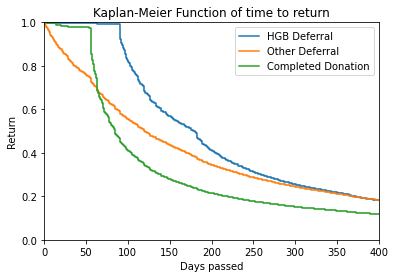

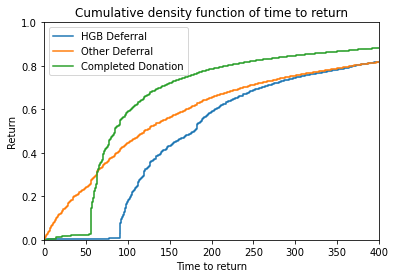

In [4]:
#fiiting the curves
kmf_hgb.fit(durations =  hgb_def["time_to_return"],event_observed = hgb_def["CENSORED"] ,label="HGB Deferral")
kmf_other.fit(durations =  other_def["time_to_return"],event_observed = other_def["CENSORED"], label="Other Deferral")
kmf_comp.fit(durations =  comp_don["time_to_return"],event_observed = comp_don["CENSORED"], label="Completed Donation")

#plot survival function data
kmf_hgb.plot()
kmf_other.plot()
kmf_comp.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return")

#plot cumulative density functions
plt.figure()
kmf_hgb.plot_cumulative_density()
kmf_other.plot_cumulative_density()
kmf_comp.plot_cumulative_density()
plt.axis([0, 400, 0, 1])
plt.ylabel("Return")
plt.xlabel("Time to return")
plt.title("Cumulative density function of time to return")

In [5]:
# KM fixed, mobile - for the 3 categories

#Kaplen Meier return after donation at fixed site and after donation at mobile site

#creating fitter objects

#for fixed
kmf_hgb_f= KaplanMeierFitter()
kmf_other_f=KaplanMeierFitter()
kmf_comp_f=KaplanMeierFitter()

#for mobile
kmf_hgb_m= KaplanMeierFitter()
kmf_other_m=KaplanMeierFitter()
kmf_comp_m=KaplanMeierFitter()

#divide data respectively

fixed= df.query("Fixed_mobile== 'Fixed'")
mobile= df.query("Fixed_mobile == 'Mobile'")

hgb_def_f=fixed.query("OUTCOME_TYPE == 'low hgb'")
other_def_f=fixed.query("OUTCOME_TYPE == 'other deferral'")
comp_don_f=fixed.query("OUTCOME_TYPE == 'completed'")

hgb_def_m=mobile.query("OUTCOME_TYPE == 'low hgb'")
other_def_m=mobile.query("OUTCOME_TYPE == 'other deferral'")
comp_don_m=mobile.query("OUTCOME_TYPE == 'completed'")

Text(0.5, 1.0, 'Kaplan-Meier Function of time to return after donation at a mobile clinic')

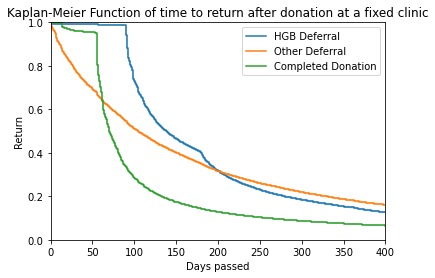

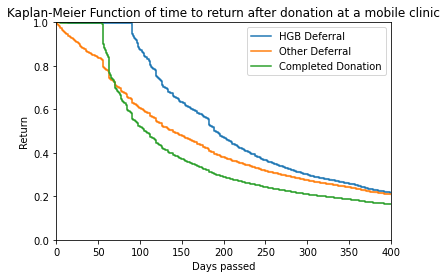

In [6]:
#fit the curves for fixed
kmf_hgb_f.fit(durations =  hgb_def_f["time_to_return"],event_observed = hgb_def_f["CENSORED"] ,label="HGB Deferral")
kmf_other_f.fit(durations =  other_def_f["time_to_return"],event_observed = other_def_f["CENSORED"], label="Other Deferral")
kmf_comp_f.fit(durations =  comp_don_f["time_to_return"],event_observed = comp_don_f["CENSORED"], label="Completed Donation")

#fit curves for mobile
kmf_hgb_m.fit(durations =  hgb_def_m["time_to_return"],event_observed = hgb_def_m["CENSORED"] ,label="HGB Deferral")
kmf_other_m.fit(durations =  other_def_m["time_to_return"],event_observed = other_def_m["CENSORED"], label="Other Deferral")
kmf_comp_m.fit(durations =  comp_don_m["time_to_return"],event_observed = comp_don_m["CENSORED"], label="Completed Donation")

#plot figures:

kmf_hgb_f.plot()
kmf_other_f.plot()
kmf_comp_f.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return after donation at a fixed clinic")

plt.figure()
kmf_hgb_m.plot()
kmf_other_m.plot()
kmf_comp_m.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return after donation at a mobile clinic")


In [ ]:
# KM on fixed-mobile pattern

hgb = df.query("DEF_TYPE == 'low hgb'")
comp = df.query("DEF_TYPE == 'completed'")

ffhgb= hgb.query("fixed_mobile_pattern == 'FF'")
fmhgb= hgb.query("fixed_mobile_pattern == 'FM'")
mfhgb= hgb.query("fixed_mobile_pattern == 'MF'")
mmhgb= hgb.query("fixed_mobile_pattern == 'MM'")

ffcomp=comp.query("fixed_mobile_pattern == 'FF'")
fmcomp=comp.query("fixed_mobile_pattern == 'FM'")
mfcomp=comp.query("fixed_mobile_pattern == 'MF'")
mmcomp=comp.query("fixed_mobile_pattern == 'MM'")

kmfhgb_ff= KaplanMeierFitter()
kmfhgb_fm= KaplanMeierFitter()
kmfhgb_mf= KaplanMeierFitter()
kmfhgb_mm= KaplanMeierFitter()

kmfcomp_ff= KaplanMeierFitter()
kmfcomp_fm= KaplanMeierFitter()
kmfcomp_mf= KaplanMeierFitter()
kmfcomp_mm= KaplanMeierFitter()

kmfhgb_ff.fit(durations =  ffhgb["time_to_return"],event_observed = ffhgb["CENSORED"] ,label="Fixed then Fixed")
kmfhgb_fm.fit(durations =  fmhgb["time_to_return"],event_observed = fmhgb["CENSORED"], label="Fixed then Mobile")
kmfhgb_mf.fit(durations =  mfhgb["time_to_return"],event_observed = mfhgb["CENSORED"] ,label="Mobile then Fixed")
kmfhgb_mm.fit(durations =  mmhgb["time_to_return"],event_observed = mmhgb["CENSORED"] ,label="Mobile then Mobile")

kmfcomp_ff.fit(durations =  ffcomp["time_to_return"],event_observed = ffcomp["CENSORED"] ,label="Fixed then Fixed")
kmfcomp_fm.fit(durations =  fmcomp["time_to_return"],event_observed = fmcomp["CENSORED"], label="Fixed then Mobile")
kmfcomp_mf.fit(durations =  mfcomp["time_to_return"],event_observed = mfcomp["CENSORED"] ,label="Mobile then Fixed")
kmfcomp_mm.fit(durations =  mmcomp["time_to_return"],event_observed = mmcomp["CENSORED"] ,label="Mobile then Mobile")

plt.figure()
kmfhgb_ff.plot_cumulative_density(linestyle='dashed')
#kmfhgb_fm.plot_cumulative_density()
#kmfhgb_mf.plot_cumulative_density()
kmfhgb_mm.plot_cumulative_density()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("After Hemoglobin Deferral")

plt.figure()
kmfcomp_ff.plot_cumulative_density()
kmfcomp_fm.plot_cumulative_density()
kmfcomp_mf.plot_cumulative_density()
kmfcomp_mm.plot_cumulative_density()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("After Completed Donation")
